<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10

## Conceptual

### Question 1

Consider a neural network with two hidden layers: $p = 4$ input units, 2 units in the first hidden layer, 3 units in the second hidden layer, and a single output.

> (a) Draw a picture of the network, similar to Figures 10.1 or 10.4.

> (b) Write out an expression for $f(X)$, assuming ReLU activation functions. Be as explicit as you can!

> (c) Now plug in some values for the coefficients and write out the value of $f(X)$.

> (d) How many parameters are there?

#### Answer to a

***Draw a picture of the network, similar to Figures 10.1 or 10.4.***

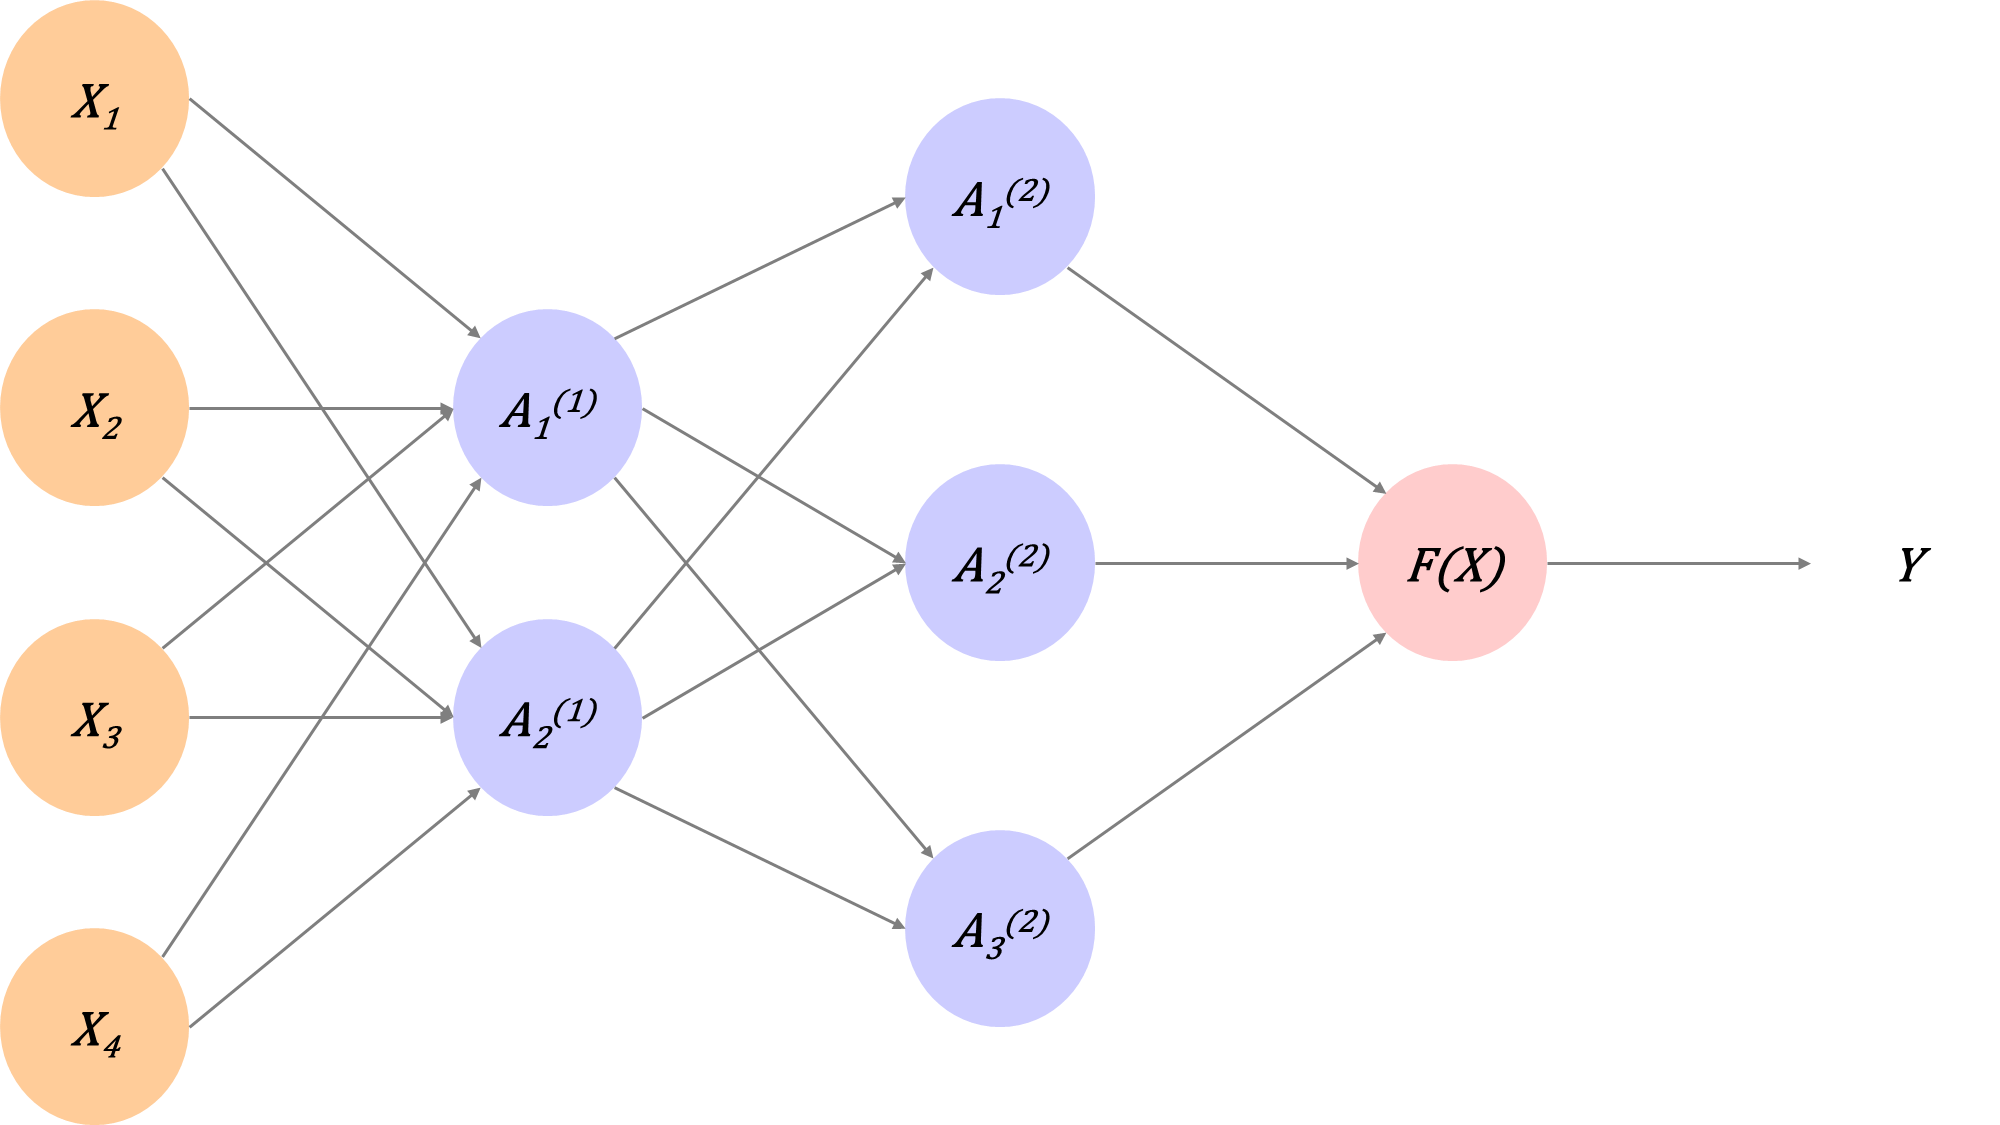

#### Answer to b

***Now plug in some values for the coefficients and write out the value of $f(X)$.***

$$\begin{align}
f(X) &= \beta_0 + \sum_{k=1}^3 \beta_k A_k^{(2)} \\
&= \beta_0 + \sum_{k=1}^3 \beta_k h_k \left(A^{(1)} \right) \\
&= \beta_0 + \sum_{k=1}^3 \beta_k g_k\left(\omega_{k_0}^{(2)} + \sum_{j=1}^2 \omega_{jk}^{(2)} A_{jk}^{(1)} \right) \\
&= \beta_0 + \sum_{k=1}^3 \beta_k \times \max\left(0, \omega_{k_0}^{(2)} + \sum_{j=1}^2 \omega_{jk}^{(2)} A_{jk}^{(1)} \right) \\&= \beta_0 + \sum_{k=1}^3 \beta_k \times \max\left(0, \omega_{k_0}^{(2)} + \sum_{j=1}^2 \omega_{jk}^{(2)} \ h_j \left(A^{(2)} \right) \right) \\
&= \beta_0 + \sum_{k=1}^3 \beta_k \times \max\left(0, \omega_{k_0}^{(2)} + \sum_{j=1}^2 \omega_{jk}^{(2)} \ g_j\left(\omega_{j_0}^{(1)} + \sum_{i=1}^4 \omega_{ij}^{(1)} X_{i} \right) \right) \\
&= \beta_0 + \sum_{k=1}^3 \beta_k \times \max\left(0, \omega_{k_0}^{(2)} + \sum_{j=1}^2 \omega_{jk}^{(2)} \ \max \left(0, \omega_{j_0}^{(1)} + \sum_{i=1}^4 \omega_{ij}^{(1)} X_{i} \right) \right) \\
\end{align}$$


#### Answer to c

***Now plug in some values for the coefficients and write out the value of $f(X)$.***

I'm just going to assign 1 to each $X_i$ and each parameter.

$$\begin{align}
1 + \sum_{k=1}^3 1 \times \max\left(0, 1 + \sum_{j=1}^2 1 \times \max\left(0, 1 + \sum_{i=1}^4 1 \times 1 \right)\right) \\
1 + \sum_{k=1}^3 1 \times \max\left(0, 1 + \sum_{j=1}^2 1 \times \max\left(0, 5 \right)\right) \\
1 + \sum_{k=1}^3 1 \times \max\left(0, 1 + \sum_{j=1}^2 5 \right) \\
1 + \sum_{k=1}^3 1 \times \max\left(0, 11 \right) \\
1 + \sum_{k=1}^3 11 \\
1 + 33 \\
34 \\
\end{align}$$

#### Answer to d

***How many parameters are there?***

Between the input and hidden-layer 1, there are $4 \text{ inputs} \times 2 \text{ nodes} + 2 \text{ biases} = 10 \text{ parameters}$

Between the first hidden layer and second hidden layer, there are $2 \text{ layer-one nodes } \times 3 \text{ layer-two nodes} + 3 \text{ biases} = 9 \text{ parameters}$

Between the second hidden layer and the output, there are $3 \text{ layer-two nodes } \times 1 \text{ output} + 1 \text{ biases} = 4 \text{ parameters}$

So altogether, there are $10 + 9 + 3 = 23 \text{ parameters}$.

### Question 2

Consider the *softmax* function in (10.13)

$$f_m(X) = Pr(Y=m|X) = \frac{e^{Z_m}}{\sum_{𝓵=0}^{M} e^{Z_𝓵}} \ \ \ \ \ (10.13)$$

(see also (4.13) on page 141)

$$Pr(Y=k|X=x) = \frac{e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp} x_p}}{\sum_{l=1}^{K} e^{\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp} x_p}} \ \ \ \ \ (4.13)$$

for modeling multinomial probabilities.

> (a) In (10.13), show that if we add a constant $c$ to each of the $z_ℓ$, then the probability is unchanged.

> (b) In (4.13), show that if we add constants $c_j , j = 0, 1,...,p$, to each of the corresponding coefficients for each of the classes, then the predictions at any new point $x$ are unchanged.

This shows that the softmax function is *over-parametrized*. However, overregularization and SGD typically constrain the solutions so that this parametrized is not a problem.

#### Answer to a

***In (10.13), show that if we add a constant $c$ to each of the $z_ℓ$, then the probability is unchanged.***

$$\begin{align}
f_m(X) = Pr(Y=m|X) &= \frac{e^{Z_m}}{\sum_{𝓵=0}^{M} e^{Z_𝓵}} \ \ \ \ \ (10.13) \\
\text{Add a constant, } c \text{ to each } z_{𝓵} \\
&= \frac{e^{Z_m + c}}{\sum_{𝓵=0}^{M} e^{Z_𝓵 + c}} \\
&= \frac{e^{Z_m}e^c}{\sum_{𝓵=0}^{M} e^{Z_𝓵}e^c} \\
&= \frac{e^{Z_m}e^c}{e^c \sum_{𝓵=0}^{M} e^{Z_𝓵}} \\
&= \frac{e^{Z_m}}{\sum_{𝓵=0}^{M} e^{Z_𝓵}} \ \ \ \ \ (10.13) \\
\end{align}$$

#### Answer to b

***In (4.13), show that if we add constants $c_j , j = 0, 1,...,p$, to each of the corresponding coefficients for each of the classes, then the predictions at any new point $x$ are unchanged.***

$$\begin{align}
&Pr(Y=k|X=x) = \frac{e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp} x_p}}{\sum_{l=1}^{K} e^{\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp} x_p}}  \ \ \ \ \ (4.13) \\
&\text{Add a constant, } c_j \text{ to each coefficient.} \\
&Pr(Y=k|X=x) = \frac{e^{(\beta_{k0} + c_0) + (\beta_{k1} + c_1)x_1 + ... + (\beta_{kp} + c_p) x_p}}{\sum_{l=1}^{K} e^{(\beta_{l0} + c_0) + (\beta_{l1} + c_1)x_1 + ... + (\beta_{lp} + c_p) x_p}} \\
&Pr(Y=k|X=x) = \frac{e^{c_1 x_1 + c_2 x_2 + ... + c_p x_p} \times e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp} x_p}}{\sum_{l=1}^{K} e^{c_1 x_1 + c_2 x_2 + ... + c_p x_p} \times e^{\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp} x_p}} \\
&Pr(Y=k|X=x) = \frac{e^{c_1 x_1 + c_2 x_2 + ... + c_p x_p} \times e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp} x_p}}{e^{c_1 x_1 + c_2 x_2 + ... + c_p x_p} \sum_{l=1}^{K} e^{\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp} x_p}} \\
&Pr(Y=k|X=x) = \frac{e^{\beta_{k0} + \beta_{k1}x_1 + ... + \beta_{kp} x_p}}{\sum_{l=1}^{K} e^{\beta_{l0} + \beta_{l1}x_1 + ... + \beta_{lp} x_p}}  \ \ \ \ \ (4.13) \\
\end{align}$$

#### Comments on overparameterization

"Overparameterization" means that different parameter values can lead to the same model outcome.  By adding constants to the coefficients, we essentially made different coefficients that nevertheless yielded the same outcome...hence, the softmax was demonstrated to be overparameterized.

Overparameterization occurs when we try to estimate more parameters than we have degrees of freedom.  It's a little like trying to solve the equation $x_1 + x_2 = 10$ where we're trying to estimate two parameters ($x$ and $y$) with only one equation; there are many possible solutions since slighly higher values of one can be accommodated by slighly lower values from the other.

But image that we could *constrain* the solution space a bit.  Say, $x \in [3,6]$; then $y$ would also be constrained such that the total solution space is constrained.  Or better yet, if we assigned $x=4$, then it must be that $y=6$.  These types of constraints can take on many forms.  Bayesian analysis does this by establishing priors.  Regularization, say with lasso, does this. etc.

If we're worried about coefficients, as we may be in regression where we are trying to interpret the coefficients, this is a bad thing.  But when we're just worried about prediction, not so much since we get the same predictions.

### Question 3

Show that the negative multinomial log-likelihood (10.14)

$$-\sum_{i=1}^{n} \sum_{m=0}^{9} y_{im} \log(f_m(x_i))$$

is equivalent to the negative log of the likelihood expression (4.5)

$$𝓵(\beta_0, \beta_1) = \prod_{i: y_i = 1} p(x_i) \prod_{i': y_{i'} = 0} (1 - p(x_{i'})) $$

when there are $M = 2$ classes.

#### Answer

$$\begin{align}
𝓛 (\beta_0, \beta_1) &= \prod_{i: y_i = 1} p(x_i) \prod_{i': y_{i'} = 0} (1 - p(x_{i'})) \\
\rightarrow -\log(𝓛(\beta_0, \beta_1)) &= -\log\left(\prod_{i: y_i = 1} p(x_i) \prod_{i': y_{i'} = 0} (1 - p(x_{i'})) \right) \\
&= -\left(\sum_{i: y_i = 1} \log(p(x_i)) + \sum_{i': y_{i'}=0} \log(1 - p(x_{i'}))\right) \\
&= -\sum_{i: y_i = 1} \log(p(x_i)) - \sum_{i': y_{i'}=0} \log(1 - p(x_{i'})) \\
&\text{Let } y \text{ be an indicator variable such that }
y_{i1} =
\begin{cases}
1, & \text{if } y_i = 1 \\
0, & \text{if } y_i = 0 \\
\end{cases}
&\text{, }
y_{i0} =
\begin{cases}
1, & \text{if } y_i = 0\\
0, & \text{if } y_i = 1
\end{cases} \text{.} \\
&\text{And let } f_1(x_i) = p(x_i) \text{, } f_0(x_i) = 1 - p(x_i) \text{.} \\
&= -\sum_{i: y_i = 1} y_{i1} \log(f_1(x_i)) - \sum_{i': y_{i'}=0} y_{i0} \log(f_0(x_{i})) \\
&= -\sum_{i=1}^n \sum_{m=0}^1 y_{im} \log(f_m(x_i))
\end{align}$$

### Question 4

Consider a CNN that takes in 32 × 32 grayscale images and has a single convolution layer with three 5 × 5 convolution filters (without boundary padding)

> (a) Draw a sketch of the input and first hidden layer similar to Figure 10.8.

> (b) How many parameters are in this model.

> (c) Explain how this model can be thought of as an ordinary feedforward neural network with the individual pixels as inputs, and with constraints on the weights in the hidden units. What are the constraints?

> (d) If there were no constraints, then how many weights would there be in the ordinary feed-forward neural network in (c)?

##### Answer to a

***Draw a sketch of the input and first hidden layer similar to Figure 10.8.***

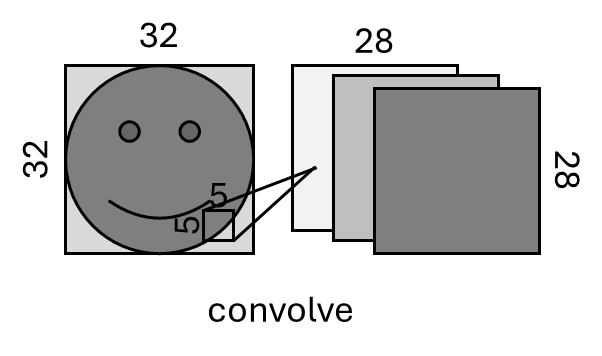

I'm not sure if I've captured the intent of the question; the question does NOT mention any pooling layers or flattening/prediction layers.

You might be curious how a 5x5 filter on a 32x32 image combine to make a 28x28 convolution; or, generally, how a AxA filter on a BxB image make a CxC convolution.

We'll just think about one dimension, going from left to right, but the same idea applies to the vertical dimension.

The left-most the left edge of the filter can reach is the left edge of the image; call this position 0.  From here, the right-most edge of the filter sits at position 5 (generically, postion A).  In this position, a single pixel is created in the convolution.

Now, slide the filter to the right until its right-most edge reaches the end of image at position 32 (position B).  Every position it slides creates another pixel in the convoution.  We can only move rightward $32 - 5 = 27$ (that is, $B - A$) positions, generating 27 pixels.

Altogether, then, we have the first pixel created by the initial position, then 27 additional pixels from sliding over the image.  This totals $32 - 5 + 1 = 28$ pixels in the convolution.  Generically, this is

$$C = B - A + 1$$

#### Answer to b

***How many parameters are in this model.***

There are three 5x5 filters, thus possessing $5 \times 5 = 25$ parameters, plus each possessing a single bias term, so there there are a total of $3 \times (25 + 1) = 78$ parameters.

#### Answers  to c and d

***Explain how this model can be thought of as an ordinary feedforward neural network with the individual pixels as inputs, and with constraints on the weights in the hidden units. What are the constraints?***

***If there were no constraints, then how many weights would there be in the ordinary feed-forward neural network in (c)?***

We could take image as a $32 \times 32 = 1,024$-element input beging connected to a $3 \times 28 \times 28 = 2,352$-element hidden layer.  In this case, the fully connected neural network would have $(1,024 + 1) \times 2,352 = 2,410,800$ parameters.

However, the input layer is NOT fully connected to the hidden layer; rather, the $5 \times 5$ filters act as *constraints* that ensure $25 < 1,024$ input elements connect to each hidden node.